In [2]:
import xarray
import numpy
import pandas
import datetime
from matplotlib import pyplot as plt
import gsw
from scipy.interpolate import griddata
import warnings
import cmocean
import limits_ranges
warnings.filterwarnings('ignore')

limits = limits_ranges.full_range()

In [3]:
df = xarray.open_dataset('../data/SOCCOM/5905382_Mprof.nc')

In [4]:
df.DOXY_ADJUSTED

<xarray.DataArray 'DOXY_ADJUSTED' (N_PROF: 186, N_LEVELS: 510)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [339.9413 , 342.76196, 347.81833, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [366.99606, 370.6389 , 362.38028, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]],
      dtype=float32)
Dimensions without coordinates: N_PROF, N_LEVELS
Attributes:
    long_name:       Dissolved oxygen
    standard_name:   moles_of_oxygen_per_unit_mass_in_sea_water
    units:           micromole/kg
    valid_min:       -5.0
    valid_max:       600.0
    C_format:        %9.3f
    FORTRAN_format:  F9.3f
    resolution:      0.001

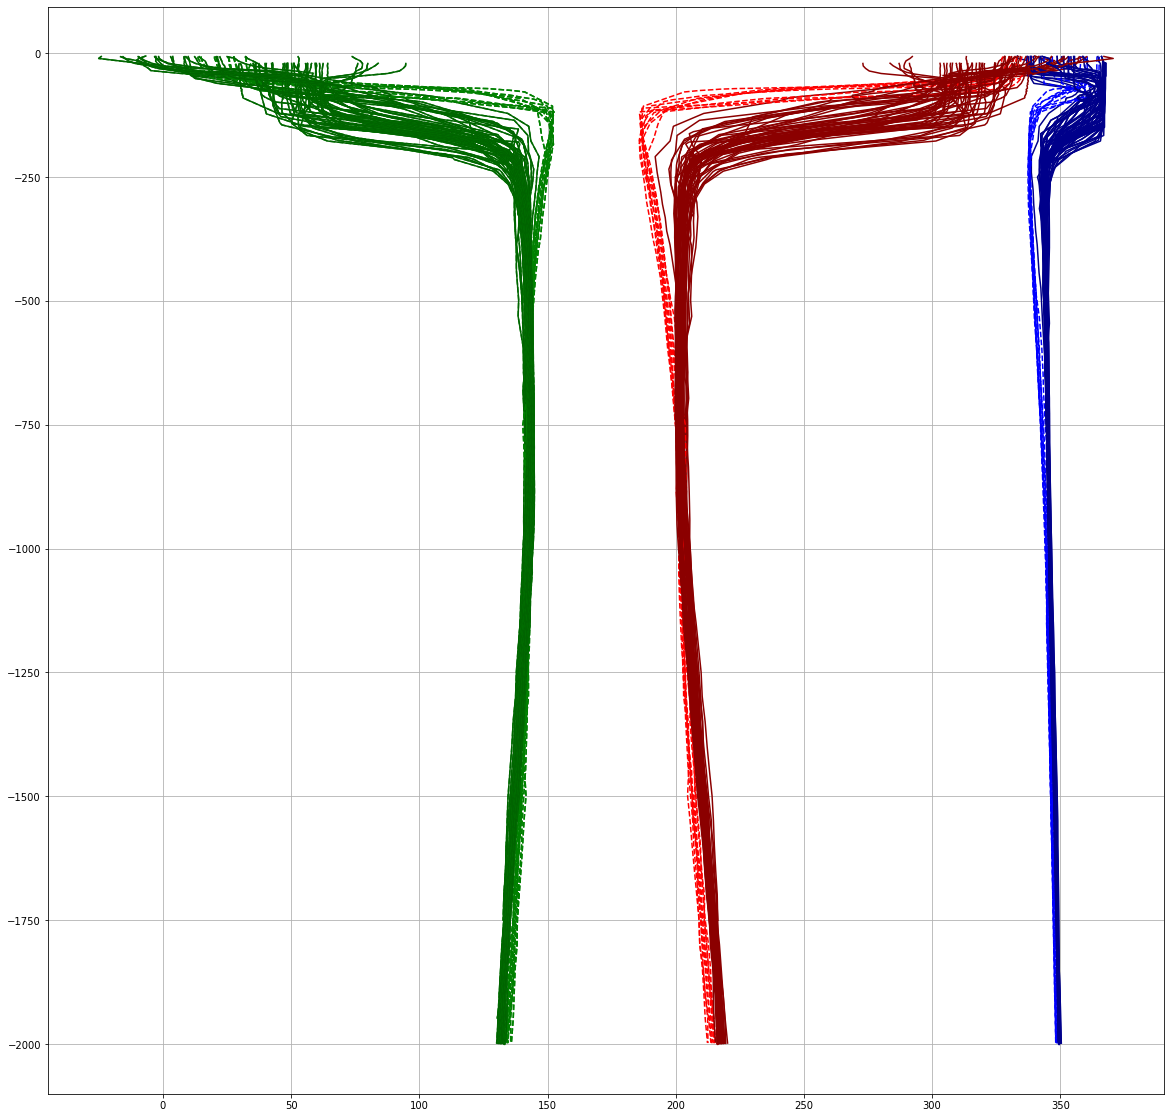

In [5]:
fig, axs = plt.subplots(figsize=[20,20])
for i in numpy.arange(1,len(df.DOXY_ADJUSTED),2):
    SA = gsw.SA_from_SP(df.PSAL_ADJUSTED[i], df.PRES_ADJUSTED[i], 3, -65)
    CT = gsw.CT_from_t(SA, df.TEMP_ADJUSTED[i], df.PRES_ADJUSTED[i])
    O2sol = gsw.O2sol(SA,CT,df.PRES_ADJUSTED[i],3,-65)
    plt.plot(O2sol - df.DOXY_ADJUSTED[i].values, -df.PRES_ADJUSTED[i], color="green", ls='--')
    if numpy.nanmin(df.DOXY_ADJUSTED[i])<190:
        plt.plot(df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="red", ls='--')
        plt.plot(O2sol, -df.PRES_ADJUSTED[i], color="blue", ls='--')
        plt.plot(O2sol - df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="green", ls='--')
    else:
        plt.plot(df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="darkred")
        plt.plot(O2sol, -df.PRES_ADJUSTED[i], color="darkblue")
        plt.plot(O2sol - df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="darkgreen")
    #plt.plot(O2sol - df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="green")
    plt.grid()

In [6]:
#fig, axs = plt.subplots(figsize=[20,20])
#for i in numpy.arange(1,len(df.DOXY_ADJUSTED),2):
#    SA = gsw.SA_from_SP(df.PSAL_ADJUSTED[i], df.PRES_ADJUSTED[i], 3, -65)
#    CT = gsw.CT_from_t(SA, df.TEMP_ADJUSTED[i], df.PRES_ADJUSTED[i])
#    O2sol = gsw.O2sol(SA,CT,df.PRES_ADJUSTED[i],3,-65)
#    plt.plot(df.DOXY_ADJUSTED[i], -df.PRES_ADJUSTED[i], color="red", ls='--')
#    plt.plot(O2sol - df.DOXY_ADJUSTED[i].values, -df.PRES_ADJUSTED[i], color="green", ls='--')
#plt.grid()

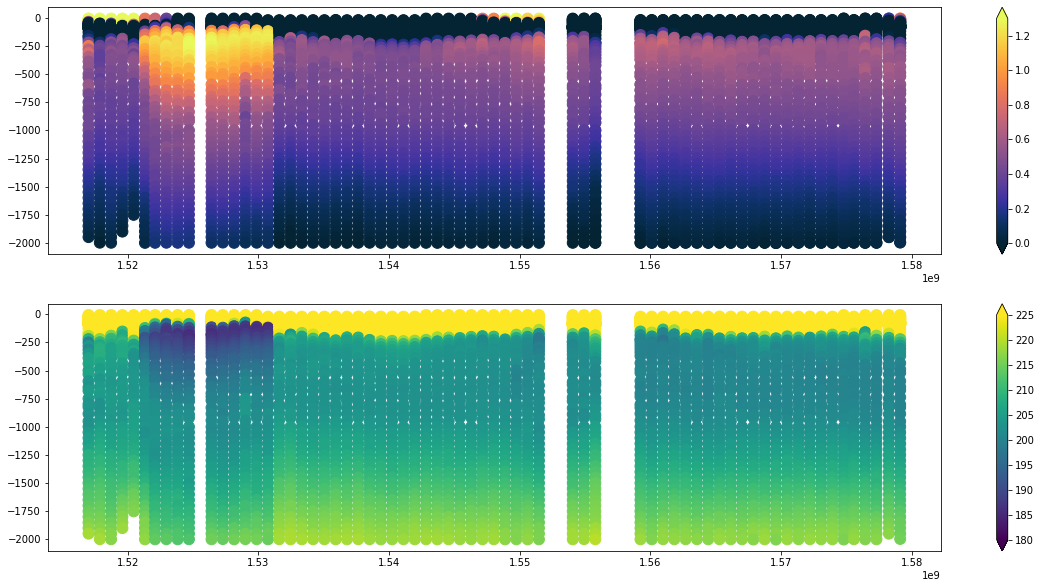

In [7]:
allx = []
ally = []
allt = []
allo = []
allaou = []
allden = []

fig, axs = plt.subplots(nrows=2,figsize=[20,10])
for i in numpy.arange(1,len(df.DOXY_ADJUSTED),2):
    mydate = df['JULD'][i]
    mydatef = datetime.datetime(mydate.dt.year, mydate.dt.month, mydate.dt.day).timestamp()
    x = [mydatef for j in range(0,len(df.PRES_ADJUSTED[i]))]
    
    SA = gsw.SA_from_SP(df.PSAL_ADJUSTED[i], df.PRES_ADJUSTED[i], 3, -65)
    CT = gsw.CT_from_t(SA, df.TEMP_ADJUSTED[i], df.PRES_ADJUSTED[i])
    O2sol = gsw.O2sol(SA,CT,df.PRES_ADJUSTED[i],3,-65)
    dens  = gsw.sigma0(SA,CT)
    
    allx.append(x)
    ally.append(-df.PRES_ADJUSTED[i].values)
    allt.append(df.TEMP_ADJUSTED[i].values)
    allo.append(df.DOXY_ADJUSTED[i].values)
    allaou.append(O2sol - df.DOXY_ADJUSTED[i].values)
    allden.append(dens)

    colors0 = axs[0].scatter(x=x, y=-df.PRES_ADJUSTED[i], c=df.TEMP_ADJUSTED[i],s=120,
                             vmin=-0.0,vmax=1.3,cmap=cmocean.cm.thermal)#, color="red", ls='--')
    colors1 = axs[1].scatter(x=x, y=-df.PRES_ADJUSTED[i], c=df.DOXY_ADJUSTED[i],s=120,
                             vmin=180,vmax=225)#,cmap=cmocean.cm.oxy)#, color="red", ls='--')

plt.colorbar(colors0,extend='both',ax=axs[0])
plt.colorbar(colors1,extend='both',ax=axs[1])
plt.show()



In [8]:
allx = numpy.array(allx).flatten()
ally = numpy.array(ally).flatten()
allt = numpy.array(allt).flatten()
allo = numpy.array(allo).flatten()
allaou = numpy.array(allaou).flatten()
allden = numpy.array(allden).flatten()

mymask = [~numpy.isnan(ally)&~numpy.isnan(ally)&~numpy.isnan(allt)]

allx = numpy.array(allx).flatten()[mymask]
ally = numpy.array(ally).flatten()[mymask]
allt = numpy.array(allt).flatten()[mymask]
allo = numpy.array(allo).flatten()[mymask]
allaou = numpy.array(allaou).flatten()[mymask]
allden = numpy.array(allden).flatten()[mymask]



#allx = allx[~numpy.isnan(ally)&~numpy.isnan(ally)&~numpy.isnan(allt)]
#allx = allx[~numpy.isnan(ally)&~numpy.isnan(ally)]
#allx = allx[~numpy.isnan(ally)&~numpy.isnan(ally)]

In [9]:
#~numpy.isnan(allx)

In [10]:
#for i in range(0,len(allx)):
#    if numpy.isnan([allx[i], ally[i], allt[i]]).any():
        

yi = numpy.linspace(0, -2000, 401)
xi = numpy.linspace(min(allx),max(allx), 500)#'2015-07-01', '2015-08-01', periods=100)
#xi = numpy.linspace(min(allx)[0],#.astype('int'),
#            max(allx)[0], 500)

grid_z0_t = griddata(
            points=numpy.array(
                [numpy.array(allx).flatten(), numpy.array(ally).flatten()]).T,
            values=numpy.array(allt).flatten(),
            xi=(xi[None, :], yi[:, None]),
            method='linear',
            rescale=True)

grid_z0_o = griddata(
            points=numpy.array(
                [numpy.array(allx).flatten(), numpy.array(ally).flatten()]).T,
            values=numpy.array(allo).flatten(),
            xi=(xi[None, :], yi[:, None]),
            method='linear',
            rescale=True)

grid_z0_aou = griddata(
            points=numpy.array(
                [numpy.array(allx).flatten(), numpy.array(ally).flatten()]).T,
            values=numpy.array(allaou).flatten(),
            xi=(xi[None, :], yi[:, None]),
            method='linear',
            rescale=True)

grid_z0_den = griddata(
            points=numpy.array(
                [numpy.array(allx).flatten(), numpy.array(ally).flatten()]).T,
            values=numpy.array(allden).flatten(),
            xi=(xi[None, :], yi[:, None]),
            method='linear',
            rescale=True)

In [11]:
len(xi)

500

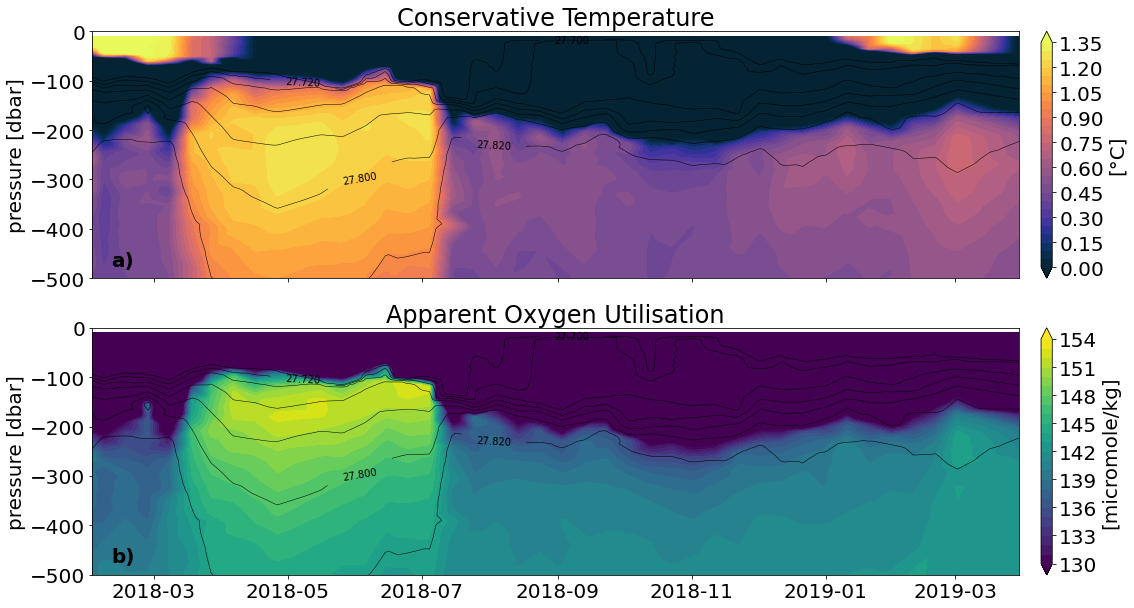

In [12]:
plt.rc('font', size=20)
import string

#plt.imshow(grid_z0_t)
#colors = ax.contourf(xi,yi,grid_z0,levels=levels,cmap=cmap,vmin=vmin, 
#         vmax=vmax, locator=locator, extend='both')
xiplot = [datetime.datetime.fromtimestamp(fdate) for fdate in xi]
#plt.contourf(xiplot,yi,grid_z0_t)
#plt.contourf(xiplot,yi,grid_z0_o)

fig, axs = plt.subplots(nrows=2,figsize=[20,10],sharex=True)
#for i in numpy.arange(1,len(df.DOXY_ADJUSTED),2):
    #mydate = df['JULD'][i]
    #mydatef = datetime.datetime(mydate.dt.year, mydate.dt.month, mydate.dt.day).timestamp()
    #x = [mydatef for j in range(0,len(df.PRES_ADJUSTED[i]))]
    
    #allx.append(x)
    #ally.append(-df.PRES_ADJUSTED[i].values)
    #allt.append(df.TEMP_ADJUSTED[i].values)
    #allo.append(df.DOXY_ADJUSTED[i].values)
    

colors0 = axs[0].contourf(xiplot, yi, grid_z0_t, levels=numpy.arange(0,1.4,0.05),
                         extend='both',cmap=cmocean.cm.thermal)#c=df.TEMP_ADJUSTED[i],s=120,
                         #vmin=-0.0,vmax=1.3,cmap=cmocean.cm.thermal)#, color="red", ls='--')
lines0 = axs[0].contour(xiplot, yi, grid_z0_den, extend='both', 
                         levels=numpy.arange(27.7,27.9,0.02), colors='k',linewidths=0.5) #vmin=limits.mins['den'], 
axs[0].clabel(lines0, inline=1, fontsize=10)
        #vmax=limits.maxs['den'], steplength=limits.steplengths['den'], 
        #locator=limits.locators['den'], linewidths=0.75)
        #plt.contourf()
colors1 = axs[1].contourf(xiplot, yi, grid_z0_aou, levels=numpy.arange(130,155,1),#levels=numpy.arange(180,225,2),
                         extend='both')#vmin=180,vmax=225)#c=df.DOXY_ADJUSTED[i],s=120,
                         #vmin=180,vmax=225)#,cmap=cmocean.cm.oxy)#, color="red", ls='--')
lines1 = axs[1].contour(xiplot, yi, grid_z0_den, extend='both', 
                         levels=numpy.arange(27.7,27.9,0.02), colors='k', linewidths=0.5)
axs[1].clabel(lines1, inline=1, fontsize=10)

axs[0].set_xlim(datetime.datetime(2018,2,1),datetime.datetime(2019,3,30))
axs[1].set_xlim(datetime.datetime(2018,2,1),datetime.datetime(2019,3,30))

axs[0].set_ylim(-500,0)
axs[1].set_ylim(-500,0)

axs[1].set_ylabel('pressure [dbar]')
axs[0].set_ylabel('pressure [dbar]')

axs[0].set_title('Conservative Temperature')
axs[1].set_title('Apparent Oxygen Utilisation')
    #axs[1].set_title('Oxygen concentration')
    
cbar0 = plt.colorbar(colors0,extend='both',ax=axs[0], pad=0.02)
cbar1 = plt.colorbar(colors1,extend='both',ax=axs[1], pad=0.02)

cbar0.set_label('[°C]')
cbar1.set_label('[micromole/kg]')

for n in [0,1]:   
    axs[n].text(0.02, 0.05, string.ascii_lowercase[n]+')', transform=axs[n].transAxes, 
            size=20, weight='bold', color='k')

plt.savefig('../plots/figures/suppl_fig3.png', dpi=300, bbox_inches='tight')
plt.show()

In [238]:
plt.contourf()

array([1.5170076e+09, 1.5170076e+09, 1.5170076e+09, ..., 1.5791292e+09,
       1.5791292e+09, 1.5791292e+09])

In [49]:
import datetime
normdates = []
for mydate in df['JULD']:#[i]
    # DATES (CAN BE) ALTERED TO OVERLAY WITH MY FLOAT DATA; ORIGINAL IS 1950, spatial overlay would be 1954
    normdates.append(datetime.date(mydate.dt.year, mydate.dt.month, mydate.dt.day))

<ipython-input-49-48f49f76d912>:5: DeprecationWarning: an integer is required (got type DataArray).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  normdates.append(datetime.date(mydate.dt.year, mydate.dt.month, mydate.dt.day))


In [54]:
numpy.array([normdates[0] for i in range(0,10)])

array([datetime.date(2018, 1, 27), datetime.date(2018, 1, 27),
       datetime.date(2018, 1, 27), datetime.date(2018, 1, 27),
       datetime.date(2018, 1, 27), datetime.date(2018, 1, 27),
       datetime.date(2018, 1, 27), datetime.date(2018, 1, 27),
       datetime.date(2018, 1, 27), datetime.date(2018, 1, 27)],
      dtype=object)

In [39]:
df

<xarray.Dataset>
Dimensions:                       (N_CALIB: 1, N_HISTORY: 0, N_LEVELS: 510, N_PARAM: 4, N_PROF: 186)
Dimensions without coordinates: N_CALIB, N_HISTORY, N_LEVELS, N_PARAM, N_PROF
Data variables: (12/71)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_ACTION                (N_HISTORY, N_PROF) object ...
    HISTORY_PARAMETER             (N_HISTORY, N_PROF) object ...
    HISTORY_START_PRES            (N_HISTORY, N_PROF) float32 ...
    HISTORY_STOP_PRES             (N_HISTORY, N_PROF) float32 ...
    HISTORY_PREVIOUS_VALUE        (N_HISTORY, N_PROF) float32 ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          FR GDAC
    source:               Argo float
    history:              2020-01-16T13:15:29Z creation
    references:           http://www.argodatamgt.org/Documentation
    comment:              free text
    user_manual_version:  3.2
    Conventions:          Argo-3.2 CF-1.6
    featureType:          trajectoryProfile